In [4]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

In [3]:
num_samples = 1000
negative_samples = np.random.multivariate_normal(
    mean=[0,3], cov=[[1, 0.5],[0.5,1]], size=num_samples)
positive_samples = np.random.multivariate_normal(
    mean=[3, 0], cov=[[1,0.5],[0.5,1]], size=num_samples)

In [5]:
inputs = np.vstack((negative_samples, positive_samples)).astype(np.float32)
targets = np.vstack((np.zeros((num_samples, 1), dtype="float32"),
                     np.ones((num_samples, 1), dtype="float32")))

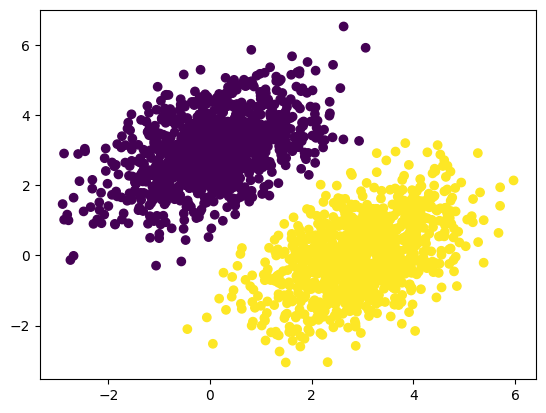

In [6]:
plt.scatter(inputs[:,0], inputs[:,1], c=targets[:,0])
plt.show()

In [7]:
i2 = inputs[:,0]

In [8]:
input_dim = 2
output_dim = 1
w = tf.Variable(tf.random.uniform((input_dim, output_dim)))
b = tf.Variable(tf.zeros((output_dim,)))

In [9]:
def model(inputs):
    return tf.matmul(inputs, w) + b

def square_loss(targets, predictions):
    per_sample_loss = tf.square(targets - predictions)
    return tf.reduce_mean(per_sample_loss)


In [12]:
learning_rate = 0.1

def training_step(inputs, targets):
    with tf.GradientTape() as tape:
        predictions = model(inputs)
        loss = square_loss(targets, predictions)
    grad_loss_wrt_w, grad_loss_wrt_b = tape.gradient(loss, [w,b])
    w.assign_sub(grad_loss_wrt_w * learning_rate)
    b.assign_sub(grad_loss_wrt_b * learning_rate)
    return loss

In [13]:
for step in range(40):
    loss = training_step(inputs, targets)
    print(f"Loss at step {step}: {loss:.4f}")

Loss at step 0: 0.1733
Loss at step 1: 0.0913
Loss at step 2: 0.0830
Loss at step 3: 0.0777
Loss at step 4: 0.0733
Loss at step 5: 0.0693
Loss at step 6: 0.0656
Loss at step 7: 0.0622
Loss at step 8: 0.0591
Loss at step 9: 0.0563
Loss at step 10: 0.0537
Loss at step 11: 0.0514
Loss at step 12: 0.0493
Loss at step 13: 0.0473
Loss at step 14: 0.0455
Loss at step 15: 0.0439
Loss at step 16: 0.0424
Loss at step 17: 0.0410
Loss at step 18: 0.0397
Loss at step 19: 0.0386
Loss at step 20: 0.0376
Loss at step 21: 0.0366
Loss at step 22: 0.0357
Loss at step 23: 0.0349
Loss at step 24: 0.0342
Loss at step 25: 0.0335
Loss at step 26: 0.0329
Loss at step 27: 0.0324
Loss at step 28: 0.0319
Loss at step 29: 0.0314
Loss at step 30: 0.0310
Loss at step 31: 0.0306
Loss at step 32: 0.0302
Loss at step 33: 0.0299
Loss at step 34: 0.0296
Loss at step 35: 0.0293
Loss at step 36: 0.0291
Loss at step 37: 0.0289
Loss at step 38: 0.0287
Loss at step 39: 0.0285


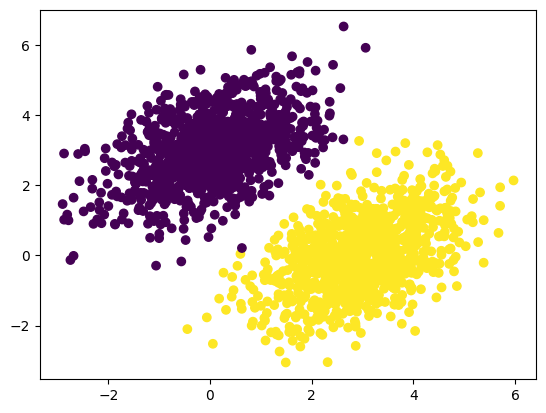

In [14]:
predictions = model(inputs)
plt.scatter(inputs[:,0], inputs[:,1], c=predictions[:,0]>0.5)
plt.show()

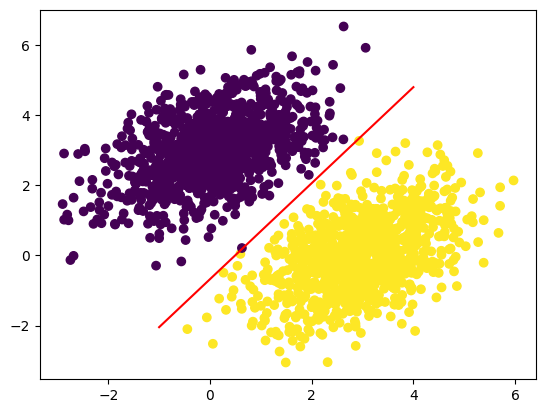

In [15]:
x = np.linspace(-1,4,1000)
y = - w[0] / w[1] * x + (0.5 - b) / w[1]
plt.plot(x, y, "-r")
plt.scatter(inputs[:,0], inputs[:,1], c=predictions[:,0]>0.5)


In [16]:
w0 = w[0]

# Definition of a line

Text is saying $w1 * x + w2 * y + b = 0.5$ as defined by matrix math:

$prediction = [w1, w2]  [x,y] + b$ which is $w1 \cdot x + w2 \cdot y + b$

*Class 0* is defined as $w1 \cdot x + w2 \cdot y + b < 0.5$

Thus, we are working with the equation for a line:
$$
  w1 \cdot x + w2 \cdot y + b = 0.5
$$

Refactoring, we get:
$$
  y = -\frac{w1}{w2} \cdot x + \frac{0.5 - b}{w2}
$$

Which, further reduces to:
$$
  y = \frac{-w1 \cdot x + 0.5 - b}{w2}
$$


# Conclusion

So we roughly computed **m** and **b** by training a ML model. This model consisted of a two layer network: $<input> \cdot [w] + b$ where the layers were matrixes **w** (really a vector) and **b** (really a scalar). We then created a training function that updated the model based on *losses* computed across our gradient (a jacobian/derivative). We train the model by running our training function 40 times across our sample data and known results.